In [ ]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

FOLDERNAME = 'ece143/'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

# This is later used to use the IMDB reviews
%cd /content/drive/My\ Drive/$FOLDERNAME/

Mounted at /content/drive
/content/drive/My Drive/ece143


# Import

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [ ]:
dataset = pd.read_csv('cleaned_data.csv', encoding='latin-1')

In [ ]:
df = pd.DataFrame(dataset)
df

,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,SWL1,SWL2,...,Gender,Age,Work,Degree,Residence,Reference,Playstyle,GAD_T,SWL_T,SPIN_T
0,0,0,0,0,0,0,0,Not difficult at all,0,0,...,Male,25,Employed,BC,USA,Reddit,online real life friends,0,33,3.0
1,0,0,0,0,0,0,0,Not difficult at all,1,1,...,Male,18,CollegeStu,HS,USA,Reddit,online real life friends,0,31,23.0
2,0,0,0,1,0,1,0,Not difficult at all,5,3,...,Male,35,Employed,HS,Canada,Reddit,online strangers,2,13,33.0
3,0,0,0,0,0,0,1,Not difficult at all,2,5,...,Male,30,Employed,BC,Bosnia and Herzegovina,Reddit,All,1,19,8.0
4,3,3,3,2,0,1,3,Extremely difficult,6,6,...,Male,24,CollegeStu,HS,Germany,Other,online acquaintances,15,9,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10041,1,1,1,0,0,2,0,Not difficult at all,2,1,...,Male,21,CollegeStu,MA,Morocco,Reddit,online strangers,5,31,6.0
10042,1,2,2,2,0,0,0,Somewhat difficult,6,6,...,Female,18,SchoolStu,Other,Netherlands,Reddit,online strangers,7,5,33.0
10043,0,1,1,1,0,2,1,Not difficult at all,2,4,...,Male,21,Unemployed,HS,USA,Reddit,online acquaintances,6,16,12.0
10044,0,0,0,0,0,0,0,Not difficult at all,1,1,...,Male,19,CollegeStu,HS,Norway,Reddit,online real life friends,0,32,10.0


# Feature Engineering

### Reference: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3545926/

In [ ]:
# Feature Variables
df_filtered = df
df_filtered['Fear_Component'] = df_filtered[['SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5', 'SPIN6']].median(axis=1).round().astype('int64')
df_filtered['Avoidance_Component'] = df_filtered[['SPIN7', 'SPIN8', 'SPIN9', 'SPIN10', 'SPIN11', 'SPIN12', 'SPIN13']].median(axis=1).round().astype('int64')
df_filtered['Physiological_Discomfort_Component'] = df_filtered[['SPIN14', 'SPIN15', 'SPIN16', 'SPIN17']].median(axis=1).round().astype('int64')


In [ ]:
dataa = [1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,0]
dd=[]

dfs1=dataa[:6]
dfs2=dataa[6:13]
dfs3=dataa[13:17]
d1 = np.array(dfs1)
d2 = np.array(dfs2)
d3 = np.array(dfs3)

print(d1)
print(d2)
print(d3)

dd.append(np.median(d1).round().astype('int64'))
dd.append(np.median(d2).round().astype('int64'))
dd.append(np.median(d3).round().astype('int64'))
# np.median(dfs)

print(dd)

# dfs['Fears']

[1 2 3 4 1 2]
[3 4 1 2 3 4 1]
[2 3 4 0]
[2, 3, 2]


In [ ]:
# Target Variables
df_filtered['Social_Phobia_Level'] = df_filtered[['Fear_Component', 'Avoidance_Component', 'Physiological_Discomfort_Component']].mean(axis=1).round().astype('int64')
# print(df_filtered['Social_Phobia_Level'])

# Feature Selection

In [ ]:
# Features and target variable
features = df_filtered[['Fear_Component', 'Avoidance_Component', 'Physiological_Discomfort_Component']]
print(features)
target = df_filtered['Social_Phobia_Level']


       Fear_Component  Avoidance_Component  Physiological_Discomfort_Component
0                   0                    0                                   0
1                   2                    1                                   1
2                   2                    2                                   2
3                   1                    0                                   0
4                   2                    3                                   1
...               ...                  ...                                 ...
10041               0                    0                                   0
10042               2                    4                                   2
10043               0                    1                                   0
10044               0                    1                                   0
10045               1                    0                                   1

[10046 rows x 3 columns]


In [ ]:
# Listing the number of rows and columns
features.shape, target.shape

((10046, 3), (10046,))

In [ ]:
print(target)

0        0
1        1
2        2
3        0
4        2
        ..
10041    0
10042    3
10043    0
10044    0
10045    1
Name: Social_Phobia_Level, Length: 10046, dtype: int64


# Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
# Splitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
# Check the shape of x_train, x_test, y_train, y_test
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8036, 3), (2010, 3), (8036,), (2010,))

# Model Implementation

## 1. Random Forest classifier

In [ ]:
# Import Library
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score, f1_score, confusion_matrix


# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random forest classifier
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Accuracy Score on the training data
x_train_prediction = rf_classifier.predict(x_train)
training_data_accuracy = accuracy_score(y_train, x_train_prediction)
print('Train data Accuracy: ',training_data_accuracy)
# print('Test data Accuracy ', rf_classifier.score(X_test,y_test))

# Accuracy score on the test data
x_test_prediction = rf_classifier.predict(x_test)
test_data_accuracy = accuracy_score(y_test,x_test_prediction)
print('Test data Accuracy:',test_data_accuracy)

score=cross_val_score(rf_classifier,features,target,cv=10)
print('Cross_val_score :',np.mean(score))

Train data Accuracy:  1.0
Test data Accuracy: 0.9995024875621891
Cross_val_score : 0.9994025886503737


In [ ]:
#classifcation report
from sklearn.metrics import classification_report
print(classification_report(x_test_prediction,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       789
           1       1.00      1.00      1.00       660
           2       1.00      1.00      1.00       411
           3       0.99      1.00      1.00       114
           4       1.00      1.00      1.00        36

    accuracy                           1.00      2010
   macro avg       1.00      1.00      1.00      2010
weighted avg       1.00      1.00      1.00      2010



## 2. Logistic Regression

In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, x_test_prediction)
print(f"Accuracy: {accuracy}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, x_test_prediction)
print("Confusion Matrix:")
print(conf_matrix)

# Precision, Recall, F1-score
precision = precision_score(y_test, x_test_prediction, average='weighted')
recall = recall_score(y_test, x_test_prediction, average='weighted')
f1 = f1_score(y_test, x_test_prediction, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


Accuracy: 0.9995024875621891
Confusion Matrix:
[[789   0   0   0   0]
 [  0 660   0   0   0]
 [  0   0 410   0   0]
 [  0   0   1 114   0]
 [  0   0   0   0  36]]
Precision: 0.9995036980547385
Recall: 0.9995024875621891
F1-score: 0.9995017042822313


In [ ]:
from sklearn.linear_model import LogisticRegression
logis_reg = LogisticRegression(random_state=42)

# Training the Logistic Regression
logis_reg.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
# Accuracy Score on the training data
x_train_prediction = logis_reg.predict(x_train)
training_data_accuracy = accuracy_score(y_train, x_train_prediction)
print('Train data Accuracy: ',training_data_accuracy)


# Accuracy score on the test data
x_test_prediction = logis_reg.predict(x_test)
test_data_accuracy = accuracy_score(y_test,x_test_prediction)
print('Test data Accuracy:',test_data_accuracy)

# Cross Validation Score
score=cross_val_score(logis_reg,features,target,cv=10)
print('Cross_val_score :',np.mean(score))

Train data Accuracy:  1.0
Test data Accuracy: 1.0
Cross_val_score : 1.0



 Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       789
           1       1.00      1.00      1.00       660
           2       1.00      1.00      1.00       410
           3       1.00      1.00      1.00       115
           4       1.00      1.00      1.00        36

    accuracy                           1.00      2010
   macro avg       1.00      1.00      1.00      2010
weighted avg       1.00      1.00      1.00      2010

[[789   0   0   0   0]
 [  0 660   0   0   0]
 [  0   0 410   0   0]
 [  0   0   0 115   0]
 [  0   0   0   0  36]]


<Axes: >

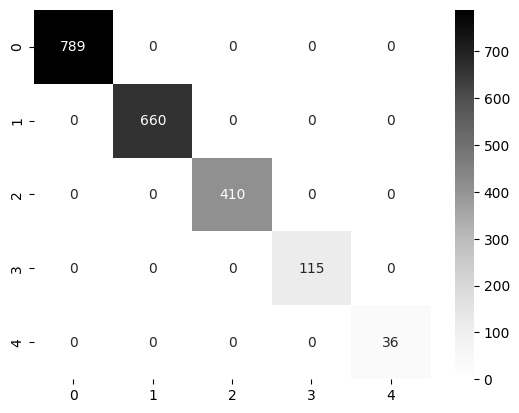

In [ ]:
#classification report Awo the test_data or test_target_value
print('\n Classification Report \n', classification_report(y_test,x_test_prediction))
print(confusion_matrix(y_test, x_test_prediction))
sns.heatmap(confusion_matrix(y_test, x_test_prediction), annot=True, cmap='Greys', fmt='g')

# print("\n AUC Score", roc_auc_score(y_test,x_test_prediction))

## K-NN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_clls = KNeighborsClassifier(n_neighbors=4)

#Train the knn for the data
KNN_clls.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
# Accuracy Score on the training data
x_train_prediction = KNN_clls.predict(x_train)
training_data_accuracy = accuracy_score(y_train, x_train_prediction)
print('Train data Accuracy: ',training_data_accuracy)


# Accuracy score on the test data
x_test_prediction = KNN_clls.predict(x_test)
test_data_accuracy = accuracy_score(y_test,x_test_prediction)
print('Test data Accuracy:',test_data_accuracy)

# Cross Validation Score
score=cross_val_score(KNN_clls,features,target,cv=10)
print('Cross_val_score :',np.mean(score))

Train data Accuracy:  0.9988800398208064
Test data Accuracy: 1.0
Cross_val_score : 0.9983077639689997


In [ ]:
#classification report Awo the test_data or test_target_value
print('\n Classification Report \n', classification_report(x_test_prediction, y_test))
cm=confusion_matrix(y_test,x_test_prediction)
print(cm)



 Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       789
           1       1.00      1.00      1.00       660
           2       1.00      1.00      1.00       410
           3       1.00      1.00      1.00       115
           4       1.00      1.00      1.00        36

    accuracy                           1.00      2010
   macro avg       1.00      1.00      1.00      2010
weighted avg       1.00      1.00      1.00      2010

[[789   0   0   0   0]
 [  0 660   0   0   0]
 [  0   0 410   0   0]
 [  0   0   0 115   0]
 [  0   0   0   0  36]]


# Prediction

In [ ]:
data = [
    [2, 3, 2],  # Example values for Fear_Component, Avoidance_Component, Physiological_Discomfort_Component
]
df_val = pd.DataFrame(data, columns=['Fear_Component', 'Avoidance_Component', 'Physiological_Discomfort_Component'])



# Making predictions on data
df_predictions = rf_classifier.predict(df_val)

# Create a DataFrame to display the data and predictions
df_with_predictions = df_val.copy()
df_with_predictions['Predicted_Social_Phobia_Level'] = df_predictions

# Display sample data with predictions
print("Data with Predictions:")
print(df_with_predictions)



Data with Predictions:
   Fear_Component  Avoidance_Component  Physiological_Discomfort_Component  \
0               2                    3                                   2   

   Predicted_Social_Phobia_Level  
0                              2  


In [ ]:
def take_fixed_options_mcq_quiz(questions):
    # Fixed set of options for all questions
    options = ["Not At All", "A Little Bit", "Somewhat", "Very Much", "Extremely"]

    # Initialize a list to store user responses
    user_responses = []

    # Display questions and get user responses
    for i, question in enumerate(questions, start=1):
        print(f"\nQuestion {i}: {question}")
        for j, option in enumerate(options, start=1):
            print(f"{j}. {option}")


        # Get user input for the selected option with exception handling
        while True:
            try:
                user_input = int(input("Your answer (enter the option number): "))

                # Validate user input
                if 1 <= user_input <= len(options):
                    break
                else:
                    print("Invalid input. Please enter a valid option number.")
            except ValueError:
                print("Invalid input. Please enter a valid integer.")

        # Store the user response
        user_responses.append(user_input)

    # Display user responses
    print("\nYour selected answers:")
    for i, response in enumerate(user_responses, start=1):
        print(f"Question {i}: {options[response - 1]}")

    print(user_responses)
    dd=[]

    dfs1=user_responses[:6]
    dfs2=user_responses[6:13]
    dfs3=user_responses[13:17]
    d1 = np.array(dfs1)
    d2 = np.array(dfs2)
    d3 = np.array(dfs3)

    print(d1)
    print(d2)
    print(d3)
    print("Median of Fear-Avoidance-Physiological columns")
    dd.append(np.median(d1).round().astype('int64'))
    dd.append(np.median(d2).round().astype('int64'))
    dd.append(np.median(d3).round().astype('int64'))
    # np.median(dfs)

    print(dd)
    ddd=[dd]
    # Create the numpy array
    symptom = np.array(["none","Mild","Moderate", "High","Extreme"])

    df_val = pd.DataFrame(ddd, columns=['Fear_Component', 'Avoidance_Component', 'Physiological_Discomfort_Component'])
    # Making predictions on data
    df_predictions = rf_classifier.predict(df_val)
    print(symptom[df_predictions][0])


# Example questions (You can customize these questions)
quiz_questions = [
    "I am afraid of people in authority.",
    "I am bothered by blushing in front of people.",
    "Parties and social events scare me.",
    "I avoid talking to people I don’t know.",
    "Being criticized scares me a lot.",
    "I avoid doing things or speaking to people for fear of embarrassment.",
    "Sweating in front of people causes me distress.",
    "I avoid going to parties.",
    "I avoid activities in which I am the center of attention.",
    "Talking to strangers scares me.",
    "I avoid having to give speeches.",
    " I would do anything to avoid being criticized.",
    "Heart palpitations bother me when I am around people.",
    "I am afraid of doing things when people might be watching.",
    "Being embarrassed or looking stupid are among my worst fears.",
    "I avoid speaking to anyone in authority.",
    "Trembling or shaking in front of others is distressing to me.",
    # Add more questions as needed
]

# Call the function with the example questions
take_fixed_options_mcq_quiz(quiz_questions)



Question 1: I am afraid of people in authority.
1. Not At All
2. A Little Bit
3. Somewhat
4. Very Much
5. Extremely
Your answer (enter the option number): 3

Question 2: I am bothered by blushing in front of people.
1. Not At All
2. A Little Bit
3. Somewhat
4. Very Much
5. Extremely
Your answer (enter the option number): 3

Question 3: Parties and social events scare me.
1. Not At All
2. A Little Bit
3. Somewhat
4. Very Much
5. Extremely
Your answer (enter the option number): 2

Question 4: I avoid talking to people I don’t know.
1. Not At All
2. A Little Bit
3. Somewhat
4. Very Much
5. Extremely
Your answer (enter the option number): 3

Question 5: Being criticized scares me a lot.
1. Not At All
2. A Little Bit
3. Somewhat
4. Very Much
5. Extremely
Your answer (enter the option number): 3

Question 6: I avoid doing things or speaking to people for fear of embarrassment.
1. Not At All
2. A Little Bit
3. Somewhat
4. Very Much
5. Extremely
Your answer (enter the option number): 2

Quest

In [ ]:



def bharat(data):
    # Create the numpy array
    symptom = np.array(["none","Mild","Moderate", "High","Extreme"])

    df_val = pd.DataFrame(data, columns=['Fear_Component', 'Avoidance_Component', 'Physiological_Discomfort_Component'])
    # Making predictions on data
    df_predictions = rf_classifier.predict(df_val)
#     print(df_predictions)
#     print(type(df_predictions))
    print(symptom[df_predictions][0])
    # Create a DataFrame to display the data and predictions
#     df_with_predictions = df_val.copy()
#     df_with_predictions['Predicted_Social_Phobia_Level'] = df_predictions
#     print(df_with_predictions)
#     print(symptom[df_with_predictions])
#     print(type(df_with_predictions))


d=[[2,2,2]]

bharat(d)


Moderate


# Outcome     Symptom Levels
    0       None
    1       Mild
    2       Moderate
    3       High
    4       extreme

In [ ]:
# df_filtered[4]
# dataframe[['column1','column2']]

df_filtered=df_filtered[["Fear_Component","Avoidance_Component","Physiological_Discomfort_Component","Social_Phobia_Level"]]
# df_filtered.to_dict()

In [ ]:
df_filtered.head(10)

,Fear_Component,Avoidance_Component,Physiological_Discomfort_Component,Social_Phobia_Level
0,0,0,0,0
1,2,1,1,1
2,2,2,2,2
3,1,0,0,0
4,2,3,1,2
5,0,0,0,0
6,2,3,2,2
7,2,1,2,2
8,0,0,1,0
9,3,3,3,3


In [ ]:
#Creating a pickle file
import pickle

pickle.dump(rf_classifier, open("social_phobia_rf.pkl","wb"))


In [ ]:
# To read
# model_loaded=pickle.load(open("social_phobia_rf.pkl","rb"))